In [1]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
import csv

<h1>About the Data</h1>

The data that we used is from the Federal Reserve Economic Board (FRED). In this case, we are getting the monthly urban average price on groceries. 

In [2]:
"""
Get the FRED dataset, a collection of average prices of groceries data in US
from February 1999 to February 2024

Read the .csv file, then get the dataframe's strctural info
Includes columns' names, index ranges for each column, and their data types
"""
groceries_df = pd.read_csv("fred_groceries_021999_022024.csv", encoding='utf-8')
groceries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         301 non-null    object 
 1   white_bread  301 non-null    float64
 2   ground_beef  301 non-null    float64
 3   egg          301 non-null    float64
 4   whole_milk   301 non-null    float64
 5   banana       301 non-null    float64
 6   urban_cpi    301 non-null    float64
dtypes: float64(6), object(1)
memory usage: 16.6+ KB


In [3]:
# Gets the names of each of the colums in this pandas dataframe
groceries_df.columns

Index(['DATE', 'white_bread', 'ground_beef', 'egg', 'whole_milk', 'banana',
       'urban_cpi'],
      dtype='object')

In [4]:
# Gets the shape of the dataframe
groceries_df.shape

(301, 7)

In [5]:
# Gets the descriptive statistics from the dataframe
groceries_df.describe()

,white_bread,ground_beef,egg,whole_milk,banana,urban_cpi
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,1.297900,2.999774,1.651575,3.289449,0.561970,227.267920
std,0.258624,1.078457,0.579640,0.392196,0.049593,42.223027
min,0.878000,0.000000,0.838000,2.656000,0.469000,163.300000
25%,1.046000,2.196000,1.257000,2.964000,0.509000,190.400000
50%,1.358000,2.818000,1.599000,3.241000,0.574000,229.554000
75%,1.419000,3.841000,1.920000,3.557000,0.601000,251.238000
max,2.033000,5.353000,4.823000,4.218000,0.643000,327.731000


In [6]:
'''
Get a correlation table
Create a new dataframe, no_date_groceries, to be set to groceries_df.
Then, drop the DATE column and create a correlation table. 
'''

no_date_groceries = groceries_df.drop(['DATE'], axis=1)

In [7]:
no_date_groceries.corr()

,white_bread,ground_beef,egg,whole_milk,banana,urban_cpi
white_bread,1.000000,0.833918,0.792305,0.798335,0.879341,0.931455
ground_beef,0.833918,1.000000,0.675822,0.628957,0.699347,0.949594
egg,0.792305,0.675822,1.000000,0.765661,0.700878,0.732184
whole_milk,0.798335,0.628957,0.765661,1.000000,0.694529,0.698135
banana,0.879341,0.699347,0.700878,0.694529,1.000000,0.799794
urban_cpi,0.931455,0.949594,0.732184,0.698135,0.799794,1.000000


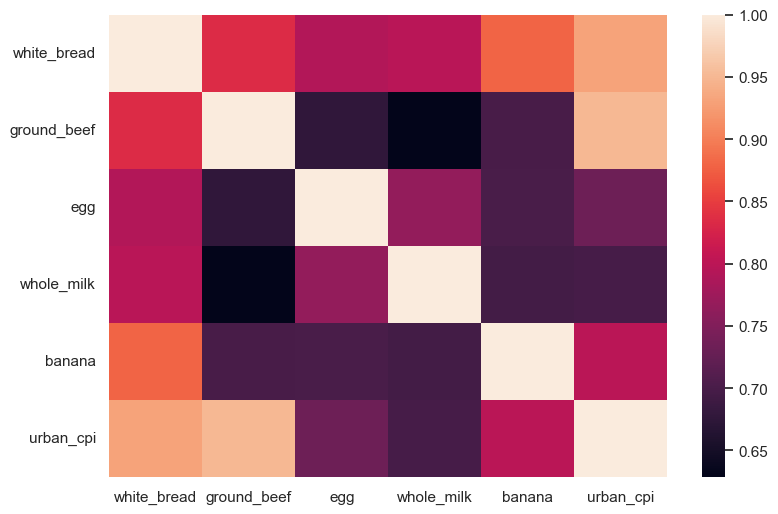

In [8]:
# Visualize the correlation table via heatmap from seaborn library. 
plt.figure(figsize=(9,6))
sns.heatmap(no_date_groceries.corr())
plt.show()

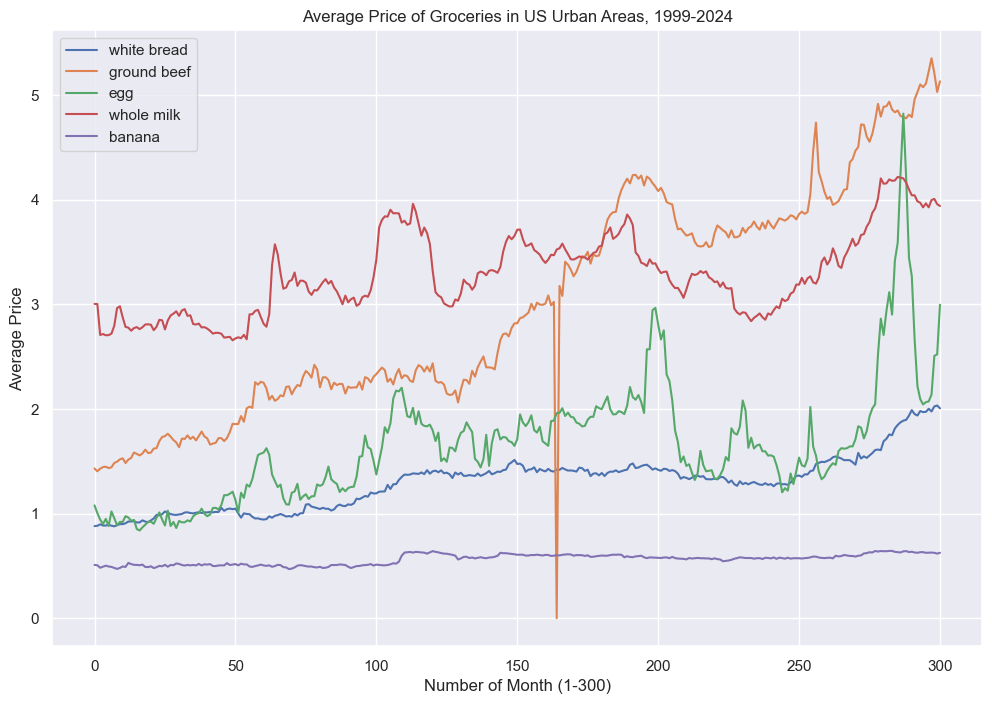

In [9]:
'''
NOTE: No dates are shown in x-axis of table; there are 25 years of data, or 300 months.
The dates range from February 1999 (month 1) to February 2024 (month 300).

Create a legend for each of the items picked and plot their average price per month.

NOTE: The price of ground beef for one of the months is listed as 0 because initially there was no listed 
average value for that month. 
'''

plt.figure(figsize=(12,8))
plt.plot(groceries_df['white_bread'])
plt.plot(groceries_df['ground_beef'])
plt.plot(groceries_df['egg'])
plt.plot(groceries_df['whole_milk'])
plt.plot(groceries_df['banana'])
plt.legend(['white bread', 'ground beef', 'egg', 'whole milk', 'banana'])
plt.xlabel("Number of Month (1-300)")
plt.ylabel("Average Price")
plt.title("Average Price of Groceries in US Urban Areas, 1999-2024")
plt.show()

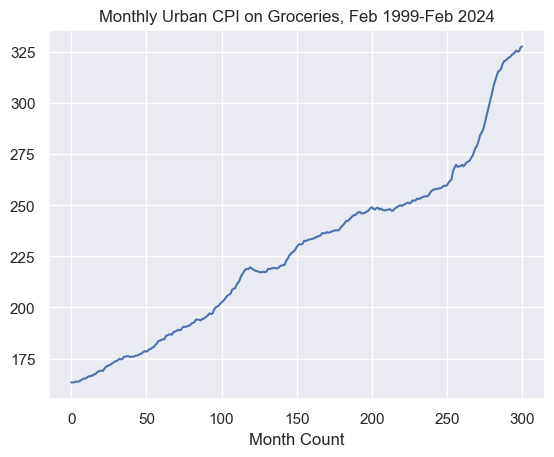

In [24]:
# Line graph of Urban CPI from Feb 1999 to Feb 2024

plt.plot(groceries_df['urban_cpi'])
plt.title("Monthly Urban CPI on Groceries, Feb 1999-Feb 2024")
plt.xlabel("Month Count")
plt.show()

In [22]:
# Use groupby to get the average price of each item by date

groceries_df.groupby(['DATE']).mean()

,white_bread,ground_beef,egg,whole_milk,banana,urban_cpi
DATE,,,,,,
1/1/2000,0.907,1.483,0.975,2.785,0.490,166.100
1/1/2001,0.982,1.693,1.011,2.852,0.500,170.900
1/1/2002,1.001,1.734,0.973,2.812,0.509,175.800
1/1/2003,1.042,1.722,1.175,2.686,0.526,177.500
1/1/2004,0.946,2.260,1.573,2.879,0.512,183.800
...,...,...,...,...,...,...
9/1/2019,1.296,3.851,1.383,3.102,0.569,258.943
9/1/2020,1.492,4.076,1.353,3.448,0.574,269.163
9/1/2021,1.580,4.504,1.835,3.585,0.597,281.506


In [23]:
# Use groupby and arrange average price of each item by date and urban CPI

groceries_df.groupby(['DATE', 'urban_cpi']).mean()

,,white_bread,ground_beef,egg,whole_milk,banana
DATE,urban_cpi,,,,,
1/1/2000,166.100,0.907,1.483,0.975,2.785,0.490
1/1/2001,170.900,0.982,1.693,1.011,2.852,0.500
1/1/2002,175.800,1.001,1.734,0.973,2.812,0.509
1/1/2003,177.500,1.042,1.722,1.175,2.686,0.526
1/1/2004,183.800,0.946,2.260,1.573,2.879,0.512
...,...,...,...,...,...,...
9/1/2019,258.943,1.296,3.851,1.383,3.102,0.569
9/1/2020,269.163,1.492,4.076,1.353,3.448,0.574
9/1/2021,281.506,1.580,4.504,1.835,3.585,0.597
